In [1]:
import numpy as np

def print_stat(narray, narray_name = 'Array'):
    print(narray_name + " stat: shape: {}, dtype: {}".format(narray.shape, narray.dtype))
    arr = narray.flatten()
    print("max: {}, min: {}, mean: {}, std: {}".format(arr.max(), arr.min(), arr.mean(), arr.std()))

res_w1, res_h1 = 1280, 800
res_w2, res_h2 = 1280, 800
F = np.array([[-4.82421044278448e-08,	-1.71285515462556e-06,	0.0135650778093583],
[1.72556528840005e-06,	1.67656609303512e-09,	-0.0143328867069307],
[-0.00912167234149013,	0.00993775597697036,	-0.681697861665831]])
image_coor = np.meshgrid(np.arange(res_h1), np.arange(res_w1))
cam_coor = np.stack([image_coor[1].T,
                     image_coor[0].T,
                     np.ones_like(image_coor[1].T)], axis=2)
image_coor2 = np.meshgrid(np.arange(res_h2), np.arange(res_w2))
cam_coor2 = np.stack([image_coor2[1].T,
                      image_coor2[0].T,
                      np.ones_like(image_coor2[1].T)], axis=2)

In [2]:
cam_coor[600,280]

array([280, 600,   1])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

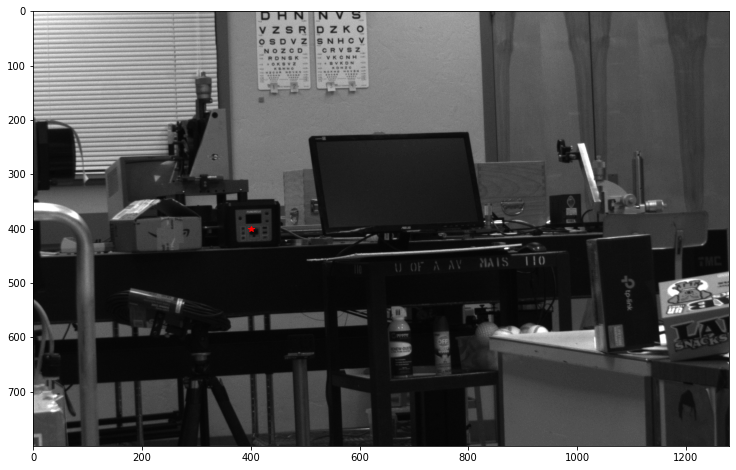

In [4]:
import cv2
point_x, point_y = 400, 400
plt.figure(figsize=(16, 8))
img1 = cv2.imread('cam4_expo150.png', 0)
plt.imshow(img1, cmap='gray')
plt.plot(point_y, point_x, marker='*', color="red")
plt.show()

In [5]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
dist = np.abs(cam_coor2.reshape((-1, 3)).dot(lam))
pps = np.argpartition(dist, res_w2, axis=0)[:res_w2].T
xxs, yys = pps//res_w2, pps%res_w2
xxs, yys

(array([[790, 325, 390, ..., 151, 602, 579]]),
 array([[866, 372, 441, ..., 187, 667, 641]]))

In [6]:
argsort = np.argsort(yys[0])

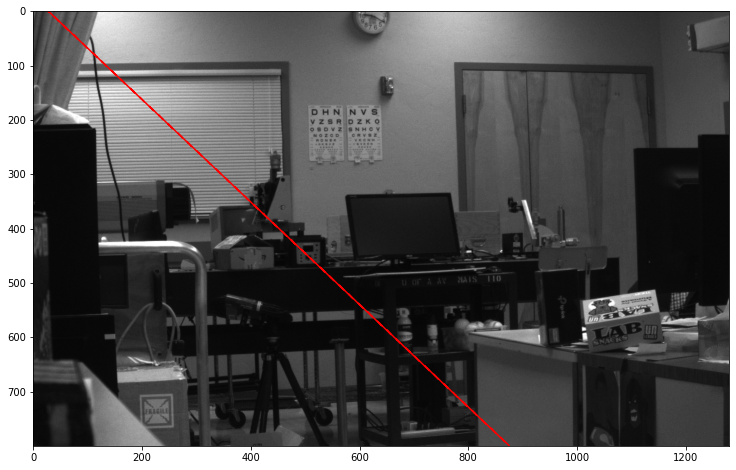

In [7]:
img2 = cv2.imread('cam1_expo500.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()

In [8]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
x_lb = int(point_x/1.5 + 140)
x_ub = int(point_x/1.5 + 220)
y_lb = int(point_y/1.5 + 190)
y_ub = int(point_y/1.5 + 270)
dist = np.abs(cam_coor2[x_lb:x_ub, y_lb:y_ub].reshape((-1, 3)).dot(lam))

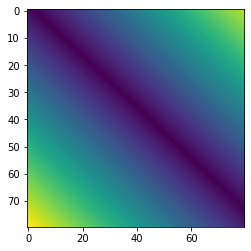

In [9]:
plt.imshow(dist.reshape(80, 80))
plt.show()

In [10]:
n = 80
pps = np.argpartition(dist, n, axis=0)[:n].T
xxs, yys = pps//n + x_lb, pps%n+y_lb
print(xxs.shape)
xxs, yys

(1, 80)


(array([[450, 463, 432, 464, 433, 465, 421, 466, 448, 416, 434, 418, 467,
         468, 431, 469, 437, 435, 417, 447, 470, 420, 430, 471, 454, 449,
         453, 438, 452, 419, 415, 451, 436, 414, 422, 423, 455, 478, 406,
         462, 439, 461, 445, 456, 413, 472, 473, 440, 429, 407, 446, 412,
         428, 474, 460, 459, 476, 426, 427, 459, 444, 408, 477, 443, 411,
         458, 426, 441, 475, 410, 457, 442, 425, 424, 409, 475, 442, 409,
         410, 443]]),
 array([[505, 519, 486, 520, 487, 521, 474, 522, 503, 469, 488, 471, 523,
         524, 485, 525, 491, 489, 470, 502, 526, 473, 484, 527, 509, 504,
         508, 492, 507, 472, 468, 506, 490, 467, 475, 476, 510, 535, 458,
         518, 493, 517, 500, 511, 466, 528, 529, 494, 483, 459, 501, 465,
         482, 530, 516, 514, 533, 480, 481, 515, 499, 460, 534, 498, 464,
         513, 479, 495, 531, 463, 512, 496, 478, 477, 461, 532, 497, 462,
         462, 497]]))

In [11]:
argsort = np.argsort(yys[0])

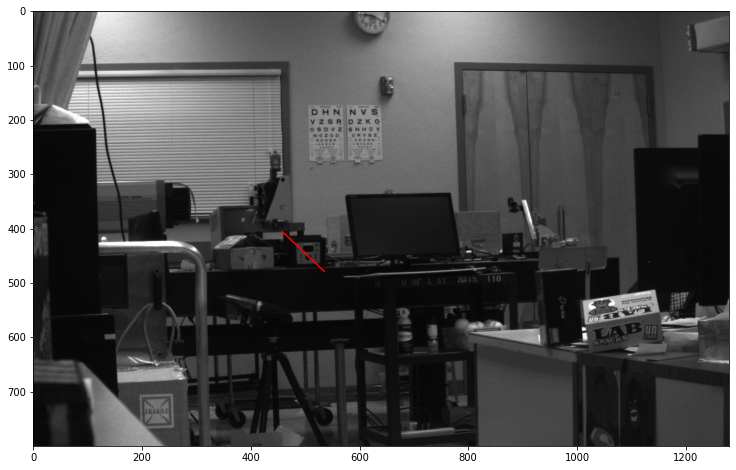

In [12]:
img2 = cv2.imread('cam1_expo500.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()

In [13]:
F = np.array([[-3.97581572992089e-08,	-3.95153001829531e-07,	0.0134920153619862],
[3.79192112912345e-07,	-5.29231028279867e-09,	-0.000385164443855964],
[-0.00889027295478548,	0.000476491990734183,	-2.94954746159413]])

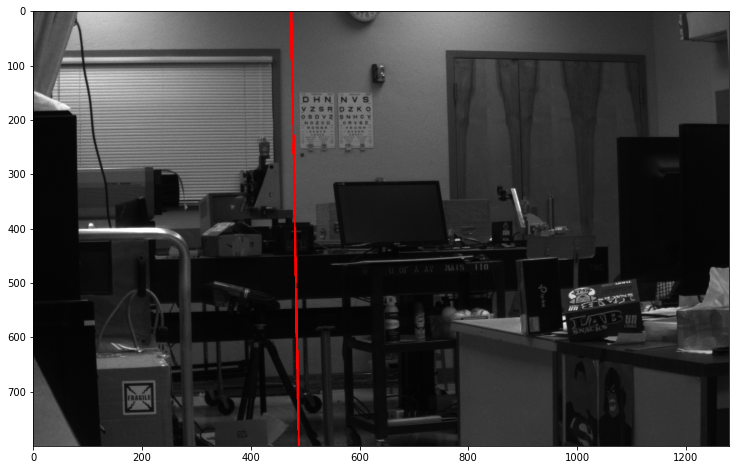

In [14]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
dist = np.abs(cam_coor2.reshape((-1, 3)).dot(lam))
pps = np.argpartition(dist, res_w2, axis=0)[:res_w2].T
xxs, yys = pps//res_w2, pps%res_w2
argsort = np.argsort(yys[0])
img2 = cv2.imread('cam2_expo300.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()

(1, 80)


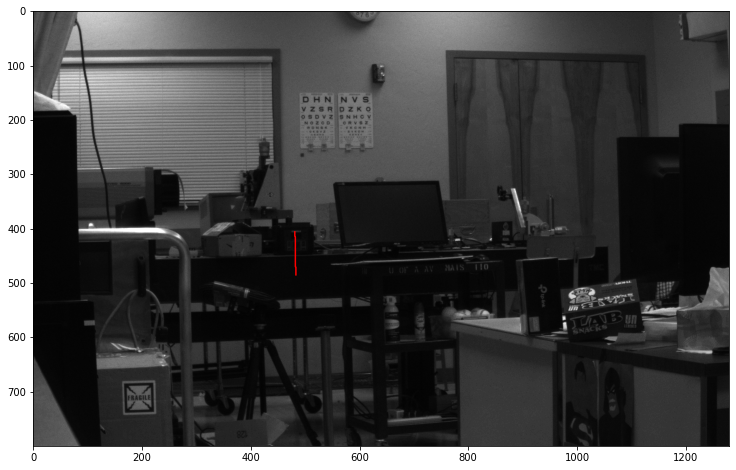

In [15]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
x_lb = int(point_x/1.5 + 140)
x_ub = int(point_x/1.5 + 220)
y_lb = int(point_y/1.5 + 190)
y_ub = int(point_y/1.5 + 270)
dist = np.abs(cam_coor2[x_lb:x_ub, y_lb:y_ub].reshape((-1, 3)).dot(lam))
n = 80
pps = np.argpartition(dist, n, axis=0)[:n].T
xxs, yys = pps//n + x_lb, pps%n+y_lb
print(xxs.shape)
argsort = np.argsort(xxs[0])
img2 = cv2.imread('cam2_expo300.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()

In [16]:
F = np.array([[-1.72325742774190e-08,	-1.70967758549794e-06,	0.000401656453872548],
[1.77514485090898e-06,	1.00163736098407e-08,	-0.0143002582536094],
[-0.000502122564603341,	0.00983482138825411,	2.53255407512145]])

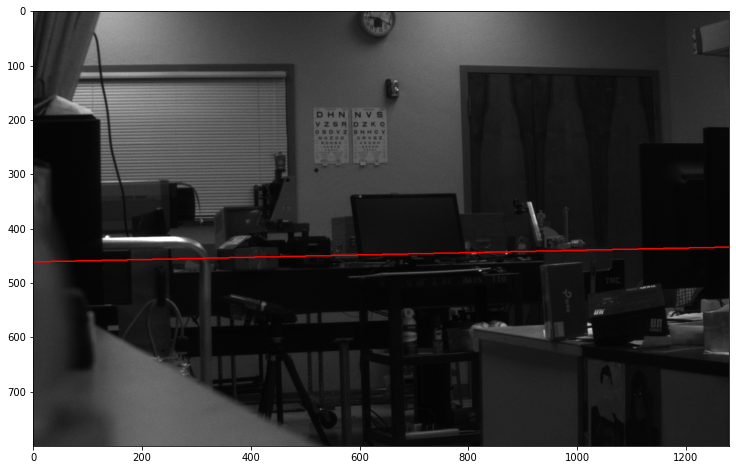

In [17]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
dist = np.abs(cam_coor2.reshape((-1, 3)).dot(lam))
pps = np.argpartition(dist, res_w2, axis=0)[:res_w2].T
xxs, yys = pps//res_w2, pps%res_w2
argsort = np.argsort(yys[0])
img2 = cv2.imread('cam3_expo800.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()

(1, 80)


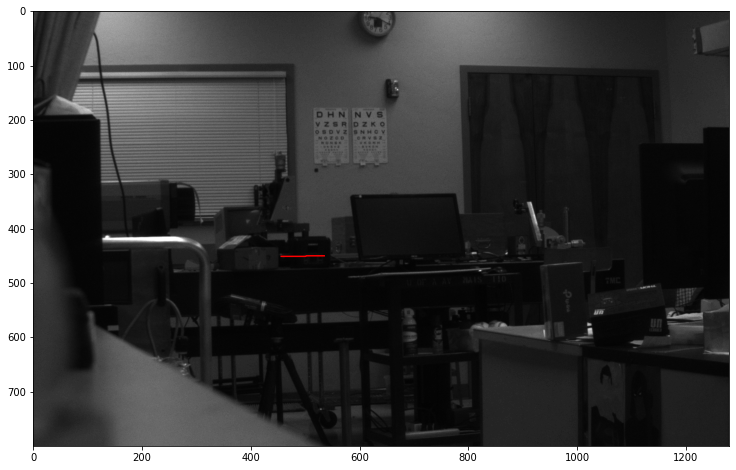

In [18]:
lam = F.dot(np.array([point_y, point_x, 1]).reshape((-1, 3)).T)
x_lb = int(point_x/1.5 + 140)
x_ub = int(point_x/1.5 + 220)
y_lb = int(point_y/1.5 + 190)
y_ub = int(point_y/1.5 + 270)
dist = np.abs(cam_coor2[x_lb:x_ub, y_lb:y_ub].reshape((-1, 3)).dot(lam))
n = 80
pps = np.argpartition(dist, n, axis=0)[:n].T
xxs, yys = pps//n + x_lb, pps%n+y_lb
print(xxs.shape)
argsort = np.argsort(yys[0])
img2 = cv2.imread('cam3_expo800.png', 0)
plt.figure(figsize=(16, 8))
plt.imshow(img2, cmap='gray')
plt.plot(yys[0, argsort], xxs[0, argsort], color="red")
plt.show()